In [477]:
import pandas as pd

PATH = 'C:/Users/skh01/Downloads/Expanded_data_with_more_features.csv/Expanded_data_with_more_features.csv'
data = pd.read_csv(PATH)
# data1 = data.copy() 

In [ ]:
# data1.shape #  30641, 15

In [478]:
data.dropna(inplace=True) #결측치 제거

In [479]:
data.drop_duplicates(inplace=True) #중복값 제거

In [480]:
data['sum_score'] = [(s1 + s2 + s3 )for s1, s2, s3 in zip(data.MathScore, data.ReadingScore, data.WritingScore)]
mean_value = data['sum_score'].mean()

In [482]:
data['avgline'] = [1 if x > mean_value else 0 for x in data['sum_score']]
data['avgline'] = data['avgline'].astype('category')

# [1 if score >= 85 else 0 for score in above['avg_score']]

In [ ]:
# TestPrep = none, completed
# LunchType = standard,free/reduced
# IsFirstChild = yes, no
# TransportMeans = school_bus, private

#더미 : Gender, TestPrep, LunchType, IsFirstChild, TransportMeans

#원핫인코딩 : ParentMaritalStatus, EthnicGroup, ParentEduc, PracticeSport, WklyStudyHours

In [483]:
#이진변수 범주형으로 변환 
# TestPrep = none, completed
# LunchType = standard,free/reduced
# IsFirstChild = yes, no
# TransportMeans = school_bus, private

data['Gender'] = data['Gender'].replace({'female': 1, 'male': 0})
data['TestPrep'] = data['TestPrep'].replace({'completed': 1, 'none': 0})
data['LunchType'] = data['TestPrep'].replace({'free/reduced': 1, 'standard': 0})
data['IsFirstChild'] = data['TestPrep'].replace({'yes': 1, 'no': 0})
data['TransportMeans'] = data['TestPrep'].replace({'private': 1, 'school_bus': 0})

# 이 부분은 범주형으로 type 전환하는 부분인데 굳이 안해도 될 듯
data['Gender'] = data['Gender'].astype('category')
data['TestPrep'] = data['TestPrep'].astype('category')
data['LunchType'] = data['TestPrep'].astype('category')
data['IsFirstChild'] = data['TestPrep'].astype('category')
data['TransportMeans'] = data['TestPrep'].astype('category')

In [384]:
#파생변수 만들기
#sports_never or not, 5 hours below or not, alone or not, avg_score

# data1['practice_sports'] = data1['PracticeSport'].replace({'sometimes': 1, 'never': 0, 'regularly':1}) 
# data1['below_5hours'] = data1['WklyStudyHours'].replace({'< 5': 1, '5 - 10': 0, '> 10':0})
# data1['alone'] = data1['NrSiblings'].replace({0.: 0, 4.: 1, 1.: 1,3.: 1,2.: 1,5.: 1,6.: 1,})
# above['avg_score'] = [(s1 + s2 + s3) / 3 for s1, s2, s3 in zip(above.MathScore, above.ReadingScore, above.WritingScore)]
# above['high_avg'] = [1 if score >= 85 else 0 for score in above['avg_score']]
      
# avg_score = [(s1 + s2 + s3) / 3 for s1, s2, s3 in zip(score1, score2, score3)]

<ipython-input-384-7a4b807933c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above['avg_score'] = [(s1 + s2 + s3) / 3 for s1, s2, s3 in zip(above.MathScore, above.ReadingScore, above.WritingScore)]
<ipython-input-384-7a4b807933c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above['high_avg'] = [1 if score >= 85 else 0 for score in above['avg_score']]


In [484]:
#원핫인코딩 : ParentMaritalStatus, EthnicGroup, ParentEduc, PracticeSport, WklyStudyHours

data = pd.get_dummies(data,columns=['ParentMaritalStatus','EthnicGroup', 'ParentEduc', 'PracticeSport', 'WklyStudyHours'])



In [485]:
data.shape #9790, 32

(19243, 33)

In [394]:
def bp(df, columns):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 8))

    bp_data = [df[col] for col in columns]  # 각 열(column)에 대한 데이터 리스트 생성
    ax.boxplot(bp_data, labels=columns)  # 상자그림 그리기

    ax.set_xlabel('Columns')  # x축 레이블 지정
    ax.set_ylabel('Values')  # y축 레이블 지정
    ax.set_title('Boxplot')  # 그래프 제목 지정
    
    plt.show()


In [486]:
data = data.drop(columns =['Unnamed: 0']) #Unnamed 열 제거

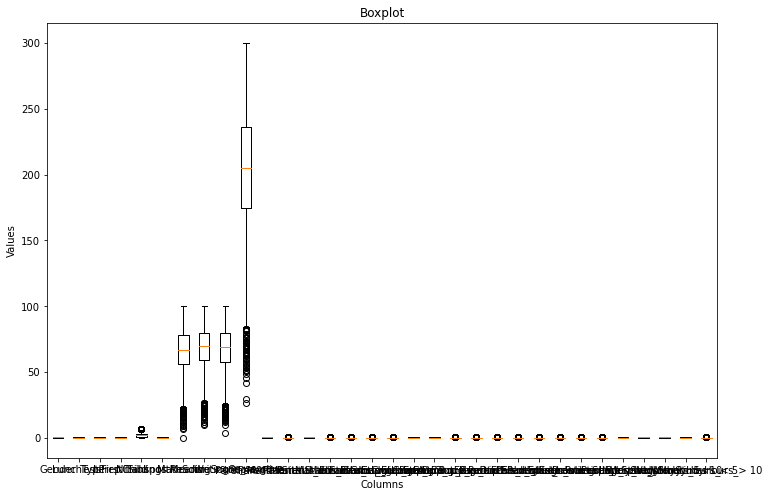

In [487]:
bp(data,data.columns)

In [397]:
#데이터 정규화 
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [488]:
data.columns

Index(['Gender', 'LunchType', 'TestPrep', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'MathScore', 'ReadingScore', 'WritingScore',
       'sum_score', 'avgline', 'ParentMaritalStatus_divorced',
       'ParentMaritalStatus_married', 'ParentMaritalStatus_single',
       'ParentMaritalStatus_widowed', 'EthnicGroup_group A',
       'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D',
       'EthnicGroup_group E', 'ParentEduc_associate's degree',
       'ParentEduc_bachelor's degree', 'ParentEduc_high school',
       'ParentEduc_master's degree', 'ParentEduc_some college',
       'ParentEduc_some high school', 'PracticeSport_never',
       'PracticeSport_regularly', 'PracticeSport_sometimes',
       'WklyStudyHours_5 - 10', 'WklyStudyHours_< 5', 'WklyStudyHours_> 10'],
      dtype='object')

In [489]:
y = data[['avgline']]

X = data[['Gender', 'NrSiblings',
       'ParentMaritalStatus_divorced',
       'ParentMaritalStatus_married', 'ParentMaritalStatus_single',
       'ParentMaritalStatus_widowed', 'EthnicGroup_group A',
       'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D',
       'EthnicGroup_group E', "ParentEduc_associate's degree",
       "ParentEduc_bachelor's degree", 'ParentEduc_high school',
       "ParentEduc_master's degree", 'ParentEduc_some college',
       'ParentEduc_some high school', 'PracticeSport_never',
       'PracticeSport_regularly', 'PracticeSport_sometimes',
       'WklyStudyHours_5 - 10', 'WklyStudyHours_< 5', 'WklyStudyHours_> 10']] #X에는 과목 점수를 예측할 때 필요하다고 판단되는 변수들을 넣으면 됨. 

#'Gender', 'LunchType', ('TestPrep',) 'IsFirstChild','practice_sports', 'below_5hours', 'alone','ParentMaritalStatus_married'

In [490]:
mm_data = mmscaler.fit_transform(X) #y값은 굳이 정규화할 필요 없음 #X 정규화.
type(mm_data)

numpy.ndarray

In [467]:
data2 = pd.DataFrame(mm_data, columns=X.columns) #data2 = 정규화된 데이터

In [468]:
data2.head()

,Gender,NrSiblings
0,1.0,0.571429
1,0.0,0.000000
2,1.0,0.142857
3,1.0,0.142857
4,1.0,0.142857


In [491]:
#test, train 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=50) 

In [492]:
#데이터 스케일링 
#train 데이터에 scaler를 fit(학습)시키고, 정규화된 데이터로 변환 
# X_train_scaled = scaler.fit_transform(X_train)

#test 데이터 정규화(이미 train 데이터로 학습시켰으므로 fit X)
X_test_scaled = mmscaler.transform(X_test)

In [493]:
#로지스틱으로 해보기 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

log_reg =  LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test_scaled)
roc_auc_score(y_test, pred)
# r2_score(y_test, pred)
# data1.high_avg.value_counts()

c:\Users\skh01\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\skh01\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5981073871168942

In [494]:
#Decision Tree 써보기 
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
from sklearn.metrics import r2_score


dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test_scaled)


c:\Users\skh01\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [495]:
dt_model.feature_importances_, dt_model.feature_importances_.shape

(array([0.03030409, 0.29087067, 0.05192715, 0.04513099, 0.04168827,
        0.01867805, 0.02256891, 0.02666915, 0.02463169, 0.02853004,
        0.04053995, 0.01341049, 0.01263698, 0.02321535, 0.01461955,
        0.01988508, 0.03470643, 0.03898813, 0.05079843, 0.04108216,
        0.0493673 , 0.03807313, 0.04167802]),
 (23,))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

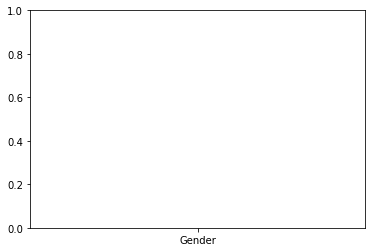

In [496]:
import matplotlib.pyplot as plt
plt.bar(data2.columns, dt_model.feature_importances_)
plt.xticks(rotation=90);

In [497]:
#Random Forest 써보기 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score



rf_model.fit(X_train, y_train)

<ipython-input-497-847049cbff68>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [498]:
pred = rf_model.predict(X_test_scaled)

c:\Users\skh01\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [499]:
roc_auc_score(y_test, pred)

0.5284772154735515

In [250]:
pred.sum()

0

In [430]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [431]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, pred)

-8.627339285394164e-05

In [433]:
pred

array([[69.52793284],
       [69.57812769],
       [69.45264058],
       ...,
       [69.50283542],
       [69.52793284],
       [69.50283542]])

In [434]:
y_test

,ReadingScore
26975,65
12316,79
1606,47
27231,93
6942,79
...,...
29954,77
9521,68
12693,71
30516,62


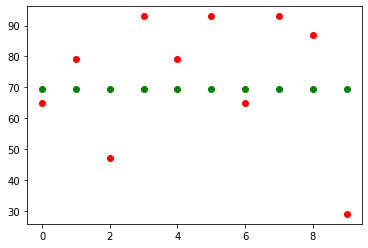

In [432]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:10],'ro')
plt.plot(pred[:10],'go')

In [286]:
# import statsmodels.api as sm
# X_train = sm.add_constant(X_train)
# model = sm.OLS(y_train, X_train, axis=1)
# model_trained = model.fit()

In [ ]:
# #오차 정규성 확인 
# import matplotlib.pyplot as plt

# model_residuals = model_trained.resid
# plt.rcParams['axes.unicode_minus'] = False  #음수 폰트 깨짐 방지
# fig, ax = plt.subplots(1, 1)
# fig.set_figheight(12)
# fig.set_figwidth(12)

# sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
# ax.title.set_text('QQ Plot')

In [ ]:
# from scipy import stats 
# stat, p = stats.shapiro(data3)

# if p < 0.05 :
#     print("정규분포가 아닙니다.")
# else:
#     print("정규분포입니다.")